In [1]:
import pandas as pd
import re
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
colors = ["#06005c",
"#6b0062",
"#ac0059",
"#dc2246",
"#f8682c",
"#ffa600"]

# Load

In [3]:
fid_list = pd.read_pickle('fid_list.pickle')
# fid_list

# Detect Question

In [4]:
fid_list.fid.unique()

array(['009', '411', '007', '008', '035', '036', '037', '386', '387',
       '390', '391', '395', '396', '023', '024', '017', '026', '029',
       '025', '028', '030', '031', '003'], dtype=object)

In [5]:
fid_list.query('fid == "036"')

,fid,pid,level,individual_level,fs_answer
336,036,0.0,0.0,0,Positius:\n-Permetrà conèixer millor els alumn...
337,036,0.0,0.0,1,Crec que la tecnologia ja és bastant present e...
338,036,0.0,0.0,0,La evolución de la tecnología siempre y cuando...
339,036,0.0,0.0,1,La evolución de la tecnología siempre y cuando...
340,036,0.0,0.0,0,Toda evolución tecnológica puede ser tanto neg...
341,036,0.0,0.0,1,En un futuro será posible que nuestros hijos t...
342,036,0.0,0.0,0,L'evolució tecnològica en un primer moment hau...
343,036,0.0,0.0,1,L'evolució tecnològica en un primer moment hau...
344,036,0.0,0.0,0,Aspectes Positius:\n\n- Aprenentatge més didàc...
345,036,0.0,0.0,1,Positivos:\r\n- métodos eficaces y rápidos \r\...


# Preprocess answers

In [6]:
# Remove non characters
fid_list['standarized'] = fid_list['fs_answer'].apply(lambda x: re.sub(r'[\n\r\b\t\f\+-]', '', x))
# Lowercase
fid_list['standarized'] = fid_list['standarized'].apply(lambda x: x.lower())
# fid_list

# Detect language

In [7]:
import spacy
from spacy.tokens import Token
from spacy.language import Language
from negspacy.negation import Negex

# DETECT LANGUAGE
def get_lang_detector(nlp, name):
    return LanguageDetector(seed=42)  # We use the seed 42
Language.factory("language_detector", func=get_lang_detector)

from spacy_language_detection import LanguageDetector

In [8]:
nlp_model = spacy.load("en_core_web_sm")

nlp_model.add_pipe('language_detector', last=True)

fid_list['lang'] = fid_list['standarized'].apply(lambda x: nlp_model(x)._.language['language'])
# fid_list

In [9]:
fid_list.loc[~fid_list['lang'].isin(['en', 'es', 'ca']), 'lang'] = 'en'

# Process documents

In [10]:
nlp_models = {
    'en': spacy.load('en_core_web_lg'),
    'es': spacy.load('es_core_news_lg'),
    'ca': spacy.load('ca_core_news_lg')
}
# DETECT NEGATIONS
for model in nlp_models.values():
    model.add_pipe("negex")
    
# DETECT NON ALPHANUMERIC
def get_excluded(token):
    # Getter function to determine if the token is excluded
    return bool(re.match(r'\W+', token.text))
Token.set_extension('is_excluded', getter=get_excluded, force=True)

def process_document(text, language):
    doc = nlp_models[language](text)
    return doc

In [11]:
fid_list['doc'] = fid_list.apply(lambda x: process_document(x['standarized'], x['lang']), axis=1)
fid_list

,fid,pid,level,individual_level,fs_answer,standarized,lang,doc
0,009,0.0,0.0,0,Technological evolution is a non-stop and real...,technological evolution is a nonstop and real ...,en,"(technological, evolution, is, a, nonstop, and..."
1,009,0.0,0.0,0,"Positive aspects: \n\n1-In the future, with Ar...","positive aspects: 1in the future, with artific...",en,"(positive, aspects, :, 1, in, the, future, ,, ..."
2,009,0.0,0.0,1,Positive:\r\nIt could improve getting on the s...,positive:it could improve getting on the sched...,en,"(positive, :, it, could, improve, getting, on,..."
3,009,0.0,0.0,0,POSITIVES:\n- Better understanding of the worl...,positives: better understanding of the world t...,en,"(positives, :, better, understanding, of, the,..."
4,009,0.0,0.0,1,"Positive aspects are, first of all, the way ev...","positive aspects are, first of all, the way ev...",en,"(positive, aspects, are, ,, first, of, all, ,,..."
...,...,...,...,...,...,...,...,...
944,003,NaN,NaN,0,There are lots of different opinions and diffe...,there are lots of different opinions and diffe...,en,"(there, are, lots, of, different, opinions, an..."
945,003,NaN,NaN,0,"Increased readability, reduced complexity and ...","increased readability, reduced complexity and ...",en,"(increased, readability, ,, reduced, complexit..."
946,003,NaN,NaN,0,High cohesion - used to make a code more under...,high cohesion used to make a code more unders...,en,"(high, cohesion, , used, to, make, a, code, m..."
947,003,NaN,NaN,0,I will consider the answer and compare it with...,i will consider the answer and compare it with...,en,"(i, will, consider, the, answer, and, compare,..."


# Answer length

In [12]:
fid_list['length'] = fid_list.doc.apply(len)
fid_list['length_clean'] = fid_list.doc.apply(lambda x: len([token for token in x if not token._.is_excluded]))
fid_list['length_special'] = fid_list.doc.apply(lambda x: len([token for token in x if token._.is_excluded]))
fid_list

,fid,pid,level,individual_level,fs_answer,standarized,lang,doc,length,length_clean,length_special
0,009,0.0,0.0,0,Technological evolution is a non-stop and real...,technological evolution is a nonstop and real ...,en,"(technological, evolution, is, a, nonstop, and...",276,253,23
1,009,0.0,0.0,0,"Positive aspects: \n\n1-In the future, with Ar...","positive aspects: 1in the future, with artific...",en,"(positive, aspects, :, 1, in, the, future, ,, ...",204,186,18
2,009,0.0,0.0,1,Positive:\r\nIt could improve getting on the s...,positive:it could improve getting on the sched...,en,"(positive, :, it, could, improve, getting, on,...",58,56,2
3,009,0.0,0.0,0,POSITIVES:\n- Better understanding of the worl...,positives: better understanding of the world t...,en,"(positives, :, better, understanding, of, the,...",159,147,12
4,009,0.0,0.0,1,"Positive aspects are, first of all, the way ev...","positive aspects are, first of all, the way ev...",en,"(positive, aspects, are, ,, first, of, all, ,,...",141,132,9
...,...,...,...,...,...,...,...,...,...,...,...
944,003,NaN,NaN,0,There are lots of different opinions and diffe...,there are lots of different opinions and diffe...,en,"(there, are, lots, of, different, opinions, an...",23,21,2
945,003,NaN,NaN,0,"Increased readability, reduced complexity and ...","increased readability, reduced complexity and ...",en,"(increased, readability, ,, reduced, complexit...",12,10,2
946,003,NaN,NaN,0,High cohesion - used to make a code more under...,high cohesion used to make a code more unders...,en,"(high, cohesion, , used, to, make, a, code, m...",48,44,4
947,003,NaN,NaN,0,I will consider the answer and compare it with...,i will consider the answer and compare it with...,en,"(i, will, consider, the, answer, and, compare,...",23,22,1


In [13]:
fid_list.fid.unique()

array(['009', '411', '007', '008', '035', '036', '037', '386', '387',
       '390', '391', '395', '396', '023', '024', '017', '026', '029',
       '025', '028', '030', '031', '003'], dtype=object)

# Main statistics

In [14]:
fid_statistics = pd.DataFrame(index=fid_list.fid.unique()).sort_index()
fid_statistics['n_answers'] = fid_list.groupby('fid').fs_answer.count().sort_index()
fid_statistics['average_length'] = fid_list.groupby('fid').length_clean.mean().sort_index()
fid_statistics['lang'] = fid_list.groupby('fid').lang.unique().apply(list).sort_index()
fid_statistics 

,n_answers,average_length,lang
003,22,24.863636,[en]
007,92,97.304348,"[es, ca]"
008,90,93.944444,"[ca, es]"
009,82,121.939024,[en]
017,49,41.897959,[en]
023,32,36.031250,"[es, ca]"
024,37,27.216216,"[ca, es]"
025,65,94.800000,[en]
026,10,60.300000,"[ca, es]"
028,51,58.411765,[en]


## KDE length

In [15]:
# Add task type
task_type = ["Close", "Open", "Open", "Open", "Open", "Open", "Open", "Open", "Open", "Close", "Open", "Close", "Close", "Open", "Open", "Open", "Close", "Close", "Close", "Close", "Close", "Close", "Open"]
task_id = [8,1,1,1,5,5,5,6,6,7,6,7,7,1,1,1,2,2,3,4,2,2,1]
fid_statistics['task_id'] = task_id
fid_statistics['task_type'] = task_type
fid_statistics

,n_answers,average_length,lang,task_id,task_type
003,22,24.863636,[en],8,Close
007,92,97.304348,"[es, ca]",1,Open
008,90,93.944444,"[ca, es]",1,Open
009,82,121.939024,[en],1,Open
017,49,41.897959,[en],5,Open
023,32,36.031250,"[es, ca]",5,Open
024,37,27.216216,"[ca, es]",5,Open
025,65,94.800000,[en],6,Open
026,10,60.300000,"[ca, es]",6,Open
028,51,58.411765,[en],7,Close


In [16]:
fid_list['task_type'] = pd.merge(left=fid_list, right=fid_statistics, left_on='fid', right_index=True, how='left')['task_type']
fid_list

,fid,pid,level,individual_level,fs_answer,standarized,lang,doc,length,length_clean,length_special,task_type
0,009,0.0,0.0,0,Technological evolution is a non-stop and real...,technological evolution is a nonstop and real ...,en,"(technological, evolution, is, a, nonstop, and...",276,253,23,Open
1,009,0.0,0.0,0,"Positive aspects: \n\n1-In the future, with Ar...","positive aspects: 1in the future, with artific...",en,"(positive, aspects, :, 1, in, the, future, ,, ...",204,186,18,Open
2,009,0.0,0.0,1,Positive:\r\nIt could improve getting on the s...,positive:it could improve getting on the sched...,en,"(positive, :, it, could, improve, getting, on,...",58,56,2,Open
3,009,0.0,0.0,0,POSITIVES:\n- Better understanding of the worl...,positives: better understanding of the world t...,en,"(positives, :, better, understanding, of, the,...",159,147,12,Open
4,009,0.0,0.0,1,"Positive aspects are, first of all, the way ev...","positive aspects are, first of all, the way ev...",en,"(positive, aspects, are, ,, first, of, all, ,,...",141,132,9,Open
...,...,...,...,...,...,...,...,...,...,...,...,...
944,003,NaN,NaN,0,There are lots of different opinions and diffe...,there are lots of different opinions and diffe...,en,"(there, are, lots, of, different, opinions, an...",23,21,2,Close
945,003,NaN,NaN,0,"Increased readability, reduced complexity and ...","increased readability, reduced complexity and ...",en,"(increased, readability, ,, reduced, complexit...",12,10,2,Close
946,003,NaN,NaN,0,High cohesion - used to make a code more under...,high cohesion used to make a code more unders...,en,"(high, cohesion, , used, to, make, a, code, m...",48,44,4,Close
947,003,NaN,NaN,0,I will consider the answer and compare it with...,i will consider the answer and compare it with...,en,"(i, will, consider, the, answer, and, compare,...",23,22,1,Close


In [ ]:
def plot_days(city, calc_set):
    data = build_data_frame(city, calc_set)
    fig, ax = plt.subplots()
    
    sns.barplot(data=data, x='Dia', y=f'{city} data', hue='period', ax=ax)
    sns.lineplot(data=data, x='Dia', y='España Actual', label='España Actual', color=barplot_colors[2], marker='o', markerfacecolor='white', markeredgecolor=barplot_colors[2])
    
    # Adjust the width of each group
    bars = plt.gca().patches
    for i, bar in enumerate(bars):
        idx = int(np.floor(i/7))
        if idx == 0:
            x = bar.get_x()
            bar.set_x(x + 0.25)
        bar.set_width(bins_widths[idx])
        bar.set_color(barplot_colors[idx])
        x = bar.get_x()
        bar.set_x(x - bins_widths[1]/2)
        
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.ylabel('porcentage de ocupación')
    plt.xlabel('')
    plt.ylim(0, 60)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color=barplot_colors[3])
    sns.despine(fig)
    handles, labels = ax.get_legend_handles_labels()
    legend = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(labels), frameon=False)

    plt.show()

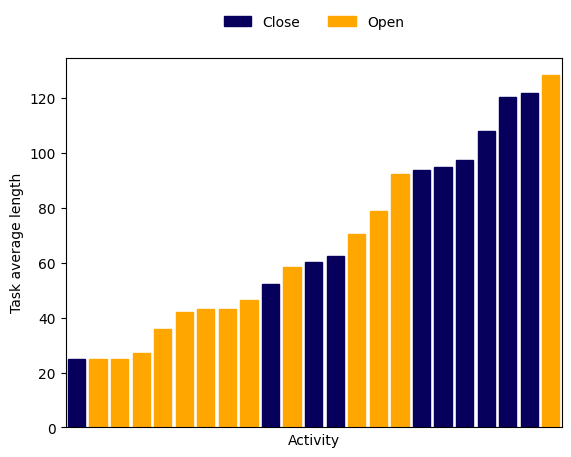

In [44]:
type_color = {
    'Close': colors[0],
    'Open': colors[-1]
}
fig, ax = plt.subplots()
sns.barplot(fid_statistics.sort_values(by='average_length').reset_index(), y='average_length', x='index', ax=ax)
# Adjust the width of each group
bars = plt.gca().patches
for i, bar in enumerate(bars):
    task_type = fid_statistics.task_type[i]
    bar.set_color(type_color[task_type])
handles, labels = ax.get_legend_handles_labels()
for label, color in type_color.items():
    patch = Patch(color=color)
    handles.append(patch)
    labels.append(label)
legend = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(labels), frameon=False)
plt.ylabel('Task average length')
plt.xlabel('Activity')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.show()

In [27]:
labels

[]

a
a


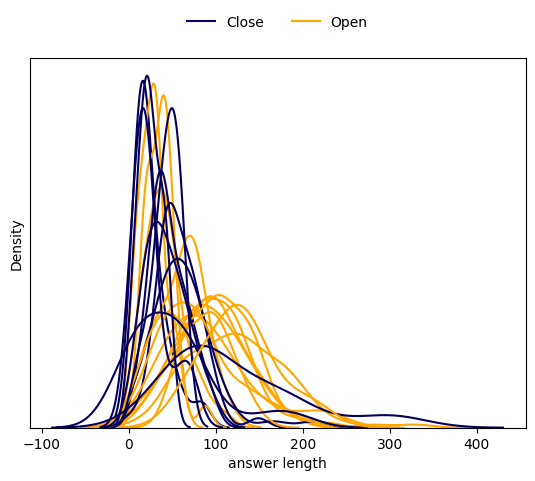

In [71]:
fig, ax = plt.subplots()
for task, task_data in fid_list.groupby('fid'):
    sns.kdeplot(task_data, x='length_clean', color=type_color[fid_statistics.task_type.loc[task]])
handles, labels = ax.get_legend_handles_labels()
for label, color in type_color.items():
    print('a')
    patch = Line2D([0], [0], lw=1.5, color=color)
    handles.append(patch)
    labels.append(label)
legend = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(labels), frameon=False)
plt.xlabel('answer length')
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
plt.show()

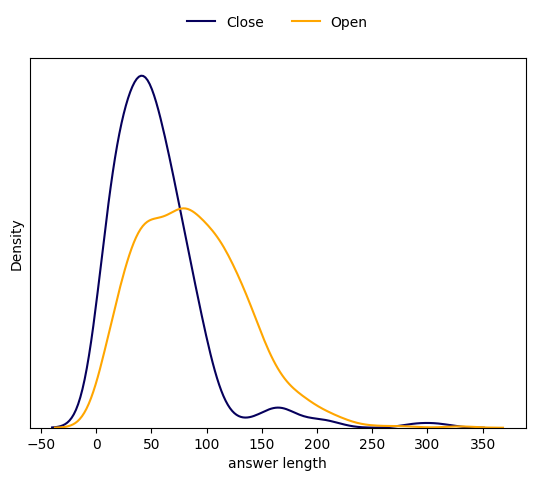

In [69]:
fig, ax = plt.subplots()
for task_type, task_data in fid_list.groupby('task_type'):
    sns.kdeplot(task_data, x='length_clean', color=type_color[task_type], label=task_type)
handles, labels = ax.get_legend_handles_labels()
# for label, color in type_color.items():
#     print('a')
#     patch = Line2D([0], [0], lw=2, color=color)
#     handles.append(patch)
#     labels.append(label)
legend = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(labels), frameon=False)
plt.xlabel('answer length')
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
plt.show()

In [38]:
rfids = ['009', '008', '007', '035', '036', '037', '441'] + ['386', '387', '395', '396']
relevant = fid_list[fid_list['fid'].isin(rfids)]
relevant.to_pickle('fid_list_analysis.pickle')
fid_statistics.to_pickle('fid_statistics.pickle')